# A Review of CFD
## 1D Linear Convection

The PDE models the temperature propagation in a pipe is given by a 1st-order hyperbolic PDE (aka wave temperature equation) in 1D. 
While an explicit solution can be found, we use the finite difference method to solve it. To discretize the equation in both space and time, we will use the **Forward Difference scheme** for time derivative and **Backward Difference scheme** for space derivative.
The partial derivative can be approximated using the derivative definition, removing the limit operator:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.ion()# all fns will be ploted on same graph

In [82]:
D = 2.0 # length of the domain
T = 0.625 # total amount of time for the analysis
nx = 31 # number of grid points
dx = D/(nx-1) # distance between any pair of adjacent grid points

In [83]:
nt = 50 # number of time iterations
dt = T/nt # amount of time each timestep covers

c = 1.0 # consider a wave speed of c = 1 m/s
d = 0.2
grid = np.linspace(0,D,nx) # creating the initial grid
u = np.ones(nx) # creating the initial conditions
u[int(0.5/dx):int(1/dx+1)]=2.0 #initial velocity is 2 between 0.5-1 and 1 in the rest
# print the initial conditions; to print 
print(u)

[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, '1D Linear Convection')

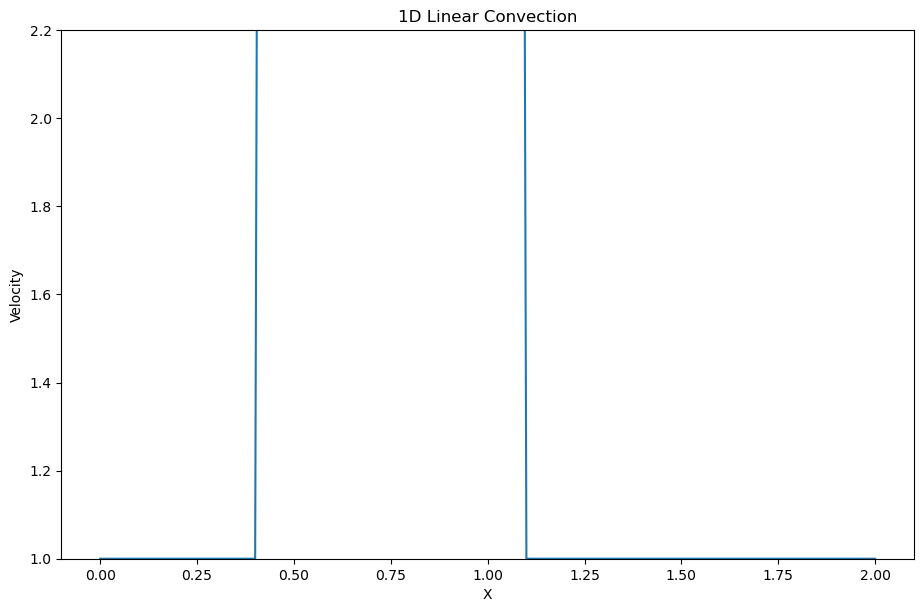

In [72]:
# plot the initial conditions; you can save the plot afterwards
plt.figure(figsize = (11,7), dpi = 100)
plt.ylim([1.,2.2])
plt.plot(grid,u)
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

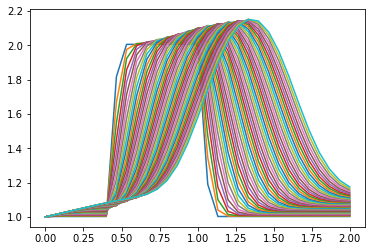

In [84]:
un  = np.ones(nx) # used only to initialize a temporary array

for n in range(nt): # loop for time iteration
    un = u.copy() # copy the existing values of u into un
    for i in range(1,nx): # looping through the grid
        u[i] = (1+d*dt)*un[i]-c*dt/dx*(un[i]-un[i-1]) # the scheme
    #plt.figure(figsize = (11,7), dpi = 100)
    plt.plot(grid,u) # this will plot u for every time step